In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
covid_data = pd.read_csv('Project Proposal Data.csv')

In [3]:
covid_data

,country,population,gdp_capita,forecasted_weeks,known_cases,known_hcw,labstaff,beds_total,percent_availbeds,predcases_all,...,predcases_mild,beds_peak,beds_peak_ICU,beds_peak_severe,forecasted_tests,forecasted_tests_critical,forecasted_tests_mild,hcw_required,deaths_estimated,deaths_actual
0,austria,8883000,51462,4,14586,121892,2022,67511,0.033,1771729,...,1417383,67511,2160,65351,1736294,1063037,673257,416566,NaN,NaN
1,belgium,11538000,47519,4,36138,171045,2626,71536,0.033,2291216,...,1832973,71536,2375,69161,2245392,1374730,870662,522623,NaN,NaN
2,bulgaria,7000000,9273,6,846,67022,1574,47029,0.016,1382769,...,1106216,47029,767,46262,1355114,829662,525452,286407,NaN,NaN
3,croatia,4052000,14910,5,1814,46637,922,22691,0.033,808952,...,647161,22691,753,21938,792773,485371,307402,155377,NaN,NaN
4,cyprus,1207000,28690,5,750,9177,339,4104,0.036,240969,...,192776,4104,147,3957,236150,144582,91568,46195,NaN,NaN
5,czechrepublic,10631000,23079,5,6499,139490,2420,69102,0.036,2121329,...,1697063,69102,2467,66635,2078902,1272797,806105,522623,NaN,NaN
6,denmark,5840000,61350,4,7268,88517,1329,14660,0.024,1163129,...,930503,14660,349,14311,1139866,697877,441989,215206,NaN,NaN
7,estonia,1313000,23266,4,1459,13063,299,6565,0.024,261152,...,208921,6565,156,6409,255929,156691,99624,46195,NaN,NaN
8,finland,5518000,50152,5,3489,105029,6859,24411,0.036,1108152,...,886521,24411,871,23540,1085989,664891,421098,195884,NaN,NaN
9,france,66990000,41464,4,147121,873495,15350,438380,0.036,13433491,...,10746793,438380,15650,422730,13164821,8060095,5104726,2525494,NaN,NaN


In [4]:
#setting the index to country name
europe = covid_data.set_index('country')
europe

,population,gdp_capita,forecasted_weeks,known_cases,known_hcw,labstaff,beds_total,percent_availbeds,predcases_all,predcases_critical,...,predcases_mild,beds_peak,beds_peak_ICU,beds_peak_severe,forecasted_tests,forecasted_tests_critical,forecasted_tests_mild,hcw_required,deaths_estimated,deaths_actual
country,,,,,,,,,,,,,,,,,,,,,
austria,8883000,51462,4,14586,121892,2022,67511,0.033,1771729,88586,...,1417383,67511,2160,65351,1736294,1063037,673257,416566,NaN,NaN
belgium,11538000,47519,4,36138,171045,2626,71536,0.033,2291216,114561,...,1832973,71536,2375,69161,2245392,1374730,870662,522623,NaN,NaN
bulgaria,7000000,9273,6,846,67022,1574,47029,0.016,1382769,69138,...,1106216,47029,767,46262,1355114,829662,525452,286407,NaN,NaN
croatia,4052000,14910,5,1814,46637,922,22691,0.033,808952,40448,...,647161,22691,753,21938,792773,485371,307402,155377,NaN,NaN
cyprus,1207000,28690,5,750,9177,339,4104,0.036,240969,12048,...,192776,4104,147,3957,236150,144582,91568,46195,NaN,NaN
czechrepublic,10631000,23079,5,6499,139490,2420,69102,0.036,2121329,106066,...,1697063,69102,2467,66635,2078902,1272797,806105,522623,NaN,NaN
denmark,5840000,61350,4,7268,88517,1329,14660,0.024,1163129,58156,...,930503,14660,349,14311,1139866,697877,441989,215206,NaN,NaN
estonia,1313000,23266,4,1459,13063,299,6565,0.024,261152,13058,...,208921,6565,156,6409,255929,156691,99624,46195,NaN,NaN
finland,5518000,50152,5,3489,105029,6859,24411,0.036,1108152,55408,...,886521,24411,871,23540,1085989,664891,421098,195884,NaN,NaN


In [5]:
#adds a new column to indicate the number of healthcare workers available in each country to treat covid patients
europe['hcw_available'] = .8 * europe['known_hcw']

#adds a new column to indicate how many healthcare workers each country lacks (i.e. the difference between the current number of healthcare workers and the number needed to cope with the forecasted patients)
europe['hcw_lacking'] = europe['hcw_required'] - europe['hcw_available']

In [6]:
europe.head()

,population,gdp_capita,forecasted_weeks,known_cases,known_hcw,labstaff,beds_total,percent_availbeds,predcases_all,predcases_critical,...,beds_peak_ICU,beds_peak_severe,forecasted_tests,forecasted_tests_critical,forecasted_tests_mild,hcw_required,deaths_estimated,deaths_actual,hcw_available,hcw_lacking
country,,,,,,,,,,,,,,,,,,,,,
austria,8883000,51462,4,14586,121892,2022,67511,0.033,1771729,88586,...,2160,65351,1736294,1063037,673257,416566,NaN,NaN,97513.6,319052.4
belgium,11538000,47519,4,36138,171045,2626,71536,0.033,2291216,114561,...,2375,69161,2245392,1374730,870662,522623,NaN,NaN,136836.0,385787.0
bulgaria,7000000,9273,6,846,67022,1574,47029,0.016,1382769,69138,...,767,46262,1355114,829662,525452,286407,NaN,NaN,53617.6,232789.4
croatia,4052000,14910,5,1814,46637,922,22691,0.033,808952,40448,...,753,21938,792773,485371,307402,155377,NaN,NaN,37309.6,118067.4
cyprus,1207000,28690,5,750,9177,339,4104,0.036,240969,12048,...,147,3957,236150,144582,91568,46195,NaN,NaN,7341.6,38853.4


In [115]:
#adding a series to see how many times the number of available hcw are required
europe['available_timesx'] = europe['hcw_required'] / europe['hcw_available']

#countries in the worst condition in terms of HCW
europe.available_timesx.nlargest()

country
greece      7.322850
poland      6.820300
cyprus      6.292225
portugal    6.105934
hungary     6.015032
Name: available_timesx, dtype: float64

In [116]:
#countries in better conditions
europe.available_timesx.nsmallest()

country
ireland        2.223177
finland        2.331308
netherlands    2.748149
germany        3.000459
denmark        3.039049
Name: available_timesx, dtype: float64

In [7]:
#top 5 populations
top_pop = europe.population.sort_values(ascending = False)
top_pop.head()

country
germany    83020000
france     66990000
italy      60360000
spain      46940000
poland     37970000
Name: population, dtype: int64

In [8]:
#top 5 known cases
top_cases = europe.known_cases.sort_values(ascending = False)
top_cases.head()

country
spain      188093
italy      172434
germany    149041
france     147121
belgium     36138
Name: known_cases, dtype: int64

Text(0, 0.5, 'Number of workers')

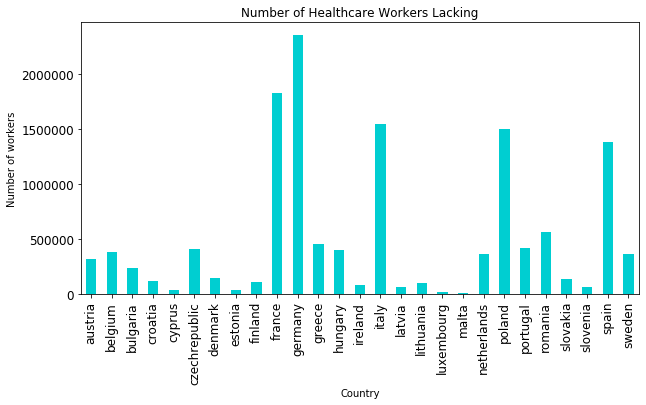

In [9]:
#plotting the number of healthcare workers lacking (currently not in their capacity) necessary for each country's virus peak
ax = europe['hcw_lacking'].plot(kind='bar', figsize=(10, 5), title = 'Number of Healthcare Workers Lacking', fontsize = 12, color = 'darkturquoise')
ax.set_xlabel("Country")
ax.set_ylabel("Number of workers")

Text(0, 0.5, 'Number of workers')

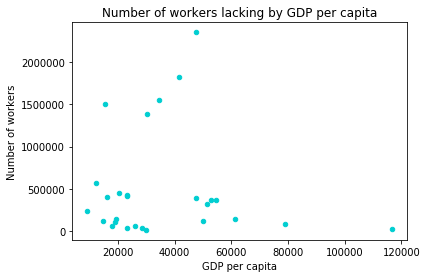

In [10]:
# scatter plot of number of healthcare workers lacking by gdp per capita
ax1 = europe.plot.scatter(x = 'gdp_capita', y = 'hcw_lacking', title = 'Number of workers lacking by GDP per capita', color = 'darkturquoise')
ax1.set_xlabel('GDP per capita')
ax1.set_ylabel('Number of workers')

Text(0, 0.5, 'Number of workers')

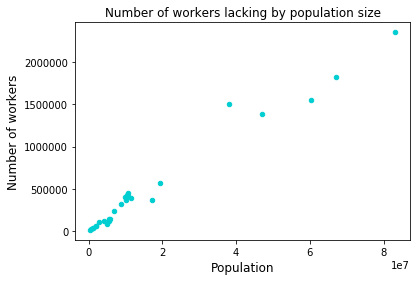

In [11]:
#by population
ax2 = europe.plot.scatter(x = 'population', y = 'hcw_lacking', title = 'Number of workers lacking by population size', color = 'darkturquoise')
ax2.set_xlabel('Population', fontsize = 12)
ax2.set_ylabel('Number of workers', fontsize = 12)

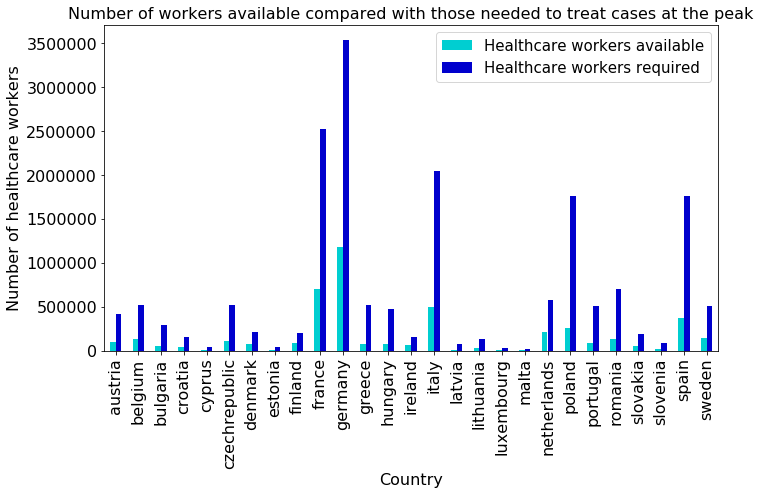

In [12]:
#a plot comparing how many healthcare workers will be availabe vs. those within each country's capacity
ax = europe[['hcw_available','hcw_required']].plot(kind = 'bar', figsize = (11, 6), legend = True, fontsize = 14, color = ['darkturquoise', 'mediumblue'])

#labels
ax.set_xlabel('Country', fontsize = 16)
ax.set_ylabel('Number of healthcare workers', fontsize = 16)
ax.set_title('Number of workers available compared with those needed to treat cases at the peak', fontsize = 16)

#fixing the legend text
ax.legend(['Healthcare workers available', 'Healthcare workers required'], fontsize = 15)

#increasing fontsize for the axes
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(16)

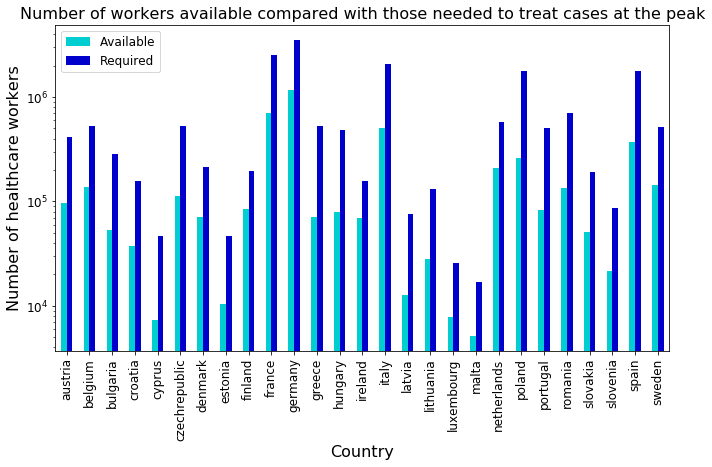

In [112]:
#exactly the same plot but with the y axis in log-scale 
ax = europe[['hcw_available','hcw_required']].plot(kind = 'bar', figsize = (11, 6), legend = True, fontsize = 12, color = ['darkturquoise', 'mediumblue'], logy = True)

#labels
ax.set_xlabel('Country', fontsize = 16)
ax.set_ylabel('Number of healthcare workers', fontsize = 16)
ax.set_title('Number of workers available compared with those needed to treat cases at the peak', fontsize = 16)

#fixing the legend text
ax.legend(['Available', 'Required'], fontsize = 12)


In [14]:
#creates a new column showing how many hospital beds a country will lack at the peak of their crisis, all else equal 
#equals how many cases are predicted to be critical condition minus beds used during the peak (the dataset outputs # of beds in use rather than required)
europe['beds_lacking'] = europe['predcases_critical'] - europe['beds_peak']

In [126]:
#adding a series to see how many times the number of available beds are required
europe['beds_timesx'] = europe['predcases_critical'] / europe['beds_peak']

#countries worst prepared in terms of beds
europe.beds_timesx.nlargest()

country
denmark    3.966985
sweden     3.837117
ireland    3.553866
spain      3.267196
cyprus     2.935673
Name: beds_timesx, dtype: float64

In [127]:
#countries "best" prepared in terms of beds
europe.beds_timesx.nsmallest()

country
germany      1.200805
austria      1.312171
lithuania    1.368781
hungary      1.427510
bulgaria     1.470114
Name: beds_timesx, dtype: float64

In [122]:
#who is "worst" prepared?
europe.beds_lacking.nlargest(5)

country
italy      394895
spain      317709
france     233295
germany    137798
poland     132077
Name: beds_lacking, dtype: int64

Text(0.5, 1.0, 'Number of Critical Care Beds Lacking')

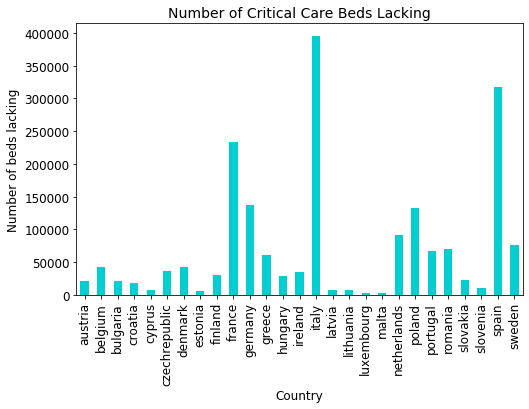

In [121]:
#plotting the number of critical care beds lacking (currently not in their capacity) necessary for each country's virus peak
ax = europe['beds_lacking'].plot(kind='bar', figsize=(8, 5), fontsize = 12, color = 'darkturquoise')
ax.set_xlabel('Country', fontsize = 12)
ax.set_ylabel('Number of beds lacking', fontsize = 12)
ax.set_title('Number of Critical Care Beds Lacking', fontsize = 14)


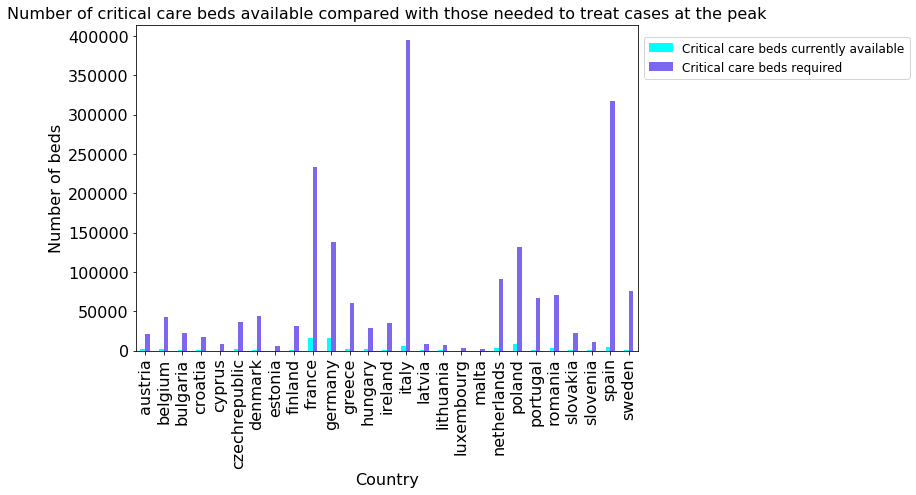

In [15]:
#a plot comparing how many critical care will be available vs. those needed at the peak of the virus
ax = europe[['beds_peak_ICU','beds_lacking']].plot(kind = 'bar', figsize = (9, 6), legend = True, fontsize = 12, color = ['cyan', 'mediumslateblue'])

#labels
ax.set_xlabel('Country', fontsize = 16)
ax.set_ylabel('Number of beds', fontsize = 16)
ax.set_title('Number of critical care beds available compared with those needed to treat cases at the peak', fontsize = 16)

#fixing the legend text
ax.legend(['Critical care beds currently available', 'Critical care beds required'], fontsize = 12,  bbox_to_anchor = (1, .98))

#increasing fontsize for the axes
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(16)

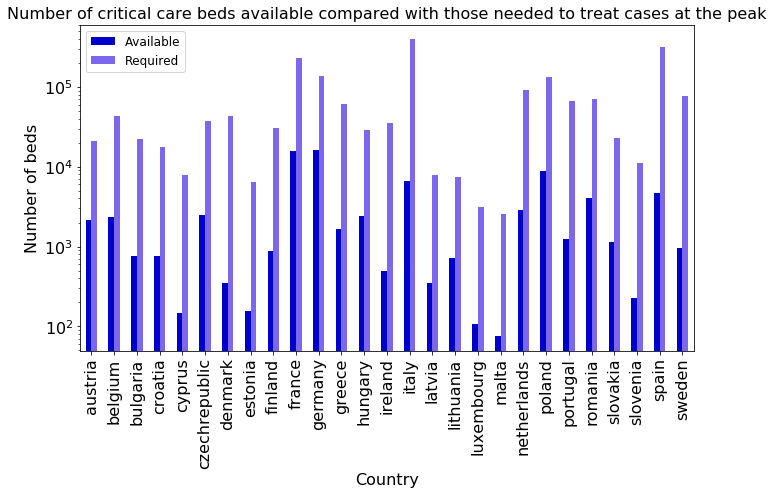

In [129]:
#same plot, with log scale
ax = europe[['beds_peak_ICU','beds_lacking']].plot(kind = 'bar', figsize = (11, 6), legend = True, fontsize = 12, color = ['mediumblue', 'mediumslateblue'], logy = True)

#labels
ax.set_xlabel('Country', fontsize = 16)
ax.set_ylabel('Number of beds', fontsize = 16)
ax.set_title('Number of critical care beds available compared with those needed to treat cases at the peak', fontsize = 16)

#fixing the legend text
ax.legend(['Available', 'Required'], fontsize = 12)

#increasing fontsize for the axes
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(16)

Text(0, 0.5, 'Number of known cases')

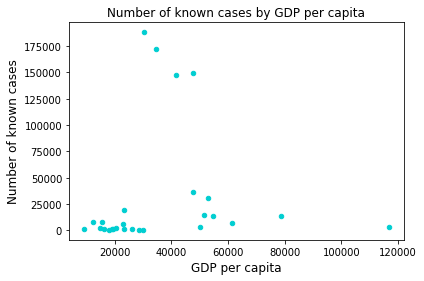

In [16]:
#a plot comparing GDP to known cases as of April 17
ax = europe.plot.scatter(x = 'gdp_capita', y = 'known_cases', title = 'Number of known cases by GDP per capita', color = 'darkturquoise')
ax.set_xlabel('GDP per capita', fontsize = 12)
ax.set_ylabel('Number of known cases', fontsize = 12)

In [17]:
#Who are those top four countries?
europe.known_cases.nlargest(4)

country
spain      188093
italy      172434
germany    149041
france     147121
Name: known_cases, dtype: int64

In [18]:
europe.known_cases.sum()

834894

In [19]:
#number of cases per person
europe['cases_percapita'] = europe['known_cases'] / europe['population']
europe['cases_percapita_perc'] = europe['cases_percapita'] * 100
europe.cases_percapita_perc

country
austria          0.164201
belgium          0.313209
bulgaria         0.012086
croatia          0.044768
cyprus           0.062138
czechrepublic    0.061133
denmark          0.124452
estonia          0.111120
finland          0.063229
france           0.219616
germany          0.179524
greece           0.020746
hungary          0.018039
ireland          0.285073
italy            0.285676
latvia           0.035521
lithuania        0.041124
luxembourg       0.566873
malta            0.085501
netherlands      0.177193
poland           0.022067
portugal         0.185039
romania          0.041561
slovakia         0.019248
slovenia         0.062662
spain            0.400709
sweden           0.129189
Name: cases_percapita_perc, dtype: float64

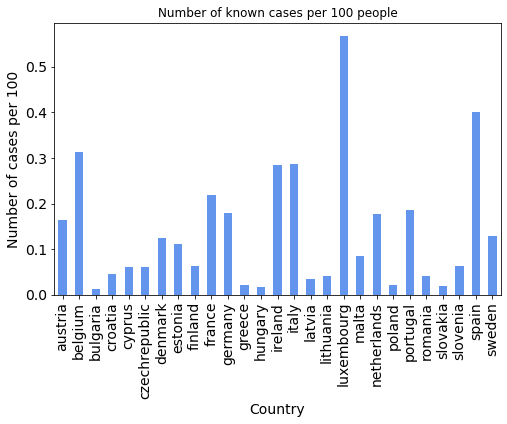

In [20]:
#graphing cases per capita

ax = europe['cases_percapita_perc'].plot(kind='bar', figsize=(8, 5), title = 'Number of known cases per 100 people', fontsize = 18, color = 'cornflowerblue')
ax.set_xlabel("Country", fontsize = 14)
ax.set_ylabel("Number of cases per 100", fontsize = 14)

#increasing fontsize for the axes
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)

# adding a series with old-age dependency ratio
This indicator is the ratio between the projected number of persons aged 65 and over (age when they are generally economically inactive) and the projected number of persons aged between 15 and 64. The value is expressed per 100 persons of working age (15-64).

In [21]:
#adding in the old age dependency ratios as a series
europe['oldage_ratio'] = [28.6, 30.1, 33.8, 32.6, 23.9, 31.2, 31.1, 31.7, 36, 33, 33.8, 35.1, 30.5, 22.1, 36.3, 32.5, 31.1, 21.1, 28.8, 30.2, 27.5, 34.5, 29, 24.5, 31.6, 30, 32]

In [22]:
europe

,population,gdp_capita,forecasted_weeks,known_cases,known_hcw,labstaff,beds_total,percent_availbeds,predcases_all,predcases_critical,...,forecasted_tests_mild,hcw_required,deaths_estimated,deaths_actual,hcw_available,hcw_lacking,beds_lacking,cases_percapita,cases_percapita_perc,oldage_ratio
country,,,,,,,,,,,,,,,,,,,,,
austria,8883000,51462,4,14586,121892,2022,67511,0.033,1771729,88586,...,673257,416566,NaN,NaN,97513.6,319052.4,21075,0.001642,0.164201,28.6
belgium,11538000,47519,4,36138,171045,2626,71536,0.033,2291216,114561,...,870662,522623,NaN,NaN,136836.0,385787.0,43025,0.003132,0.313209,30.1
bulgaria,7000000,9273,6,846,67022,1574,47029,0.016,1382769,69138,...,525452,286407,NaN,NaN,53617.6,232789.4,22109,0.000121,0.012086,33.8
croatia,4052000,14910,5,1814,46637,922,22691,0.033,808952,40448,...,307402,155377,NaN,NaN,37309.6,118067.4,17757,0.000448,0.044768,32.6
cyprus,1207000,28690,5,750,9177,339,4104,0.036,240969,12048,...,91568,46195,NaN,NaN,7341.6,38853.4,7944,0.000621,0.062138,23.9
czechrepublic,10631000,23079,5,6499,139490,2420,69102,0.036,2121329,106066,...,806105,522623,NaN,NaN,111592.0,411031.0,36964,0.000611,0.061133,31.2
denmark,5840000,61350,4,7268,88517,1329,14660,0.024,1163129,58156,...,441989,215206,NaN,NaN,70813.6,144392.4,43496,0.001245,0.124452,31.1
estonia,1313000,23266,4,1459,13063,299,6565,0.024,261152,13058,...,99624,46195,NaN,NaN,10450.4,35744.6,6493,0.001111,0.111120,31.7
finland,5518000,50152,5,3489,105029,6859,24411,0.036,1108152,55408,...,421098,195884,NaN,NaN,84023.2,111860.8,30997,0.000632,0.063229,36.0


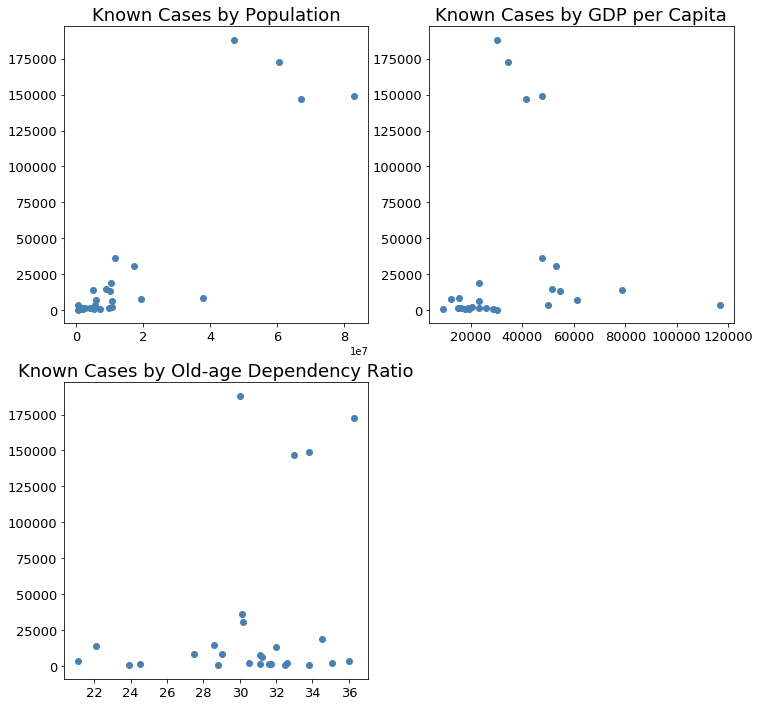

In [29]:
#subplots of known cases compared with population, GDP, avg age or % of population above age of 60

fig = plt.figure(figsize = (12, 12))
ax1 = fig.add_subplot(2,2,1)    
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

#setting the plots
ax1.scatter(europe.population, europe.known_cases, color = 'steelblue')
ax2.scatter(europe.gdp_capita, europe.known_cases, color = 'steelblue')
ax3.scatter(europe.oldage_ratio, europe.known_cases, color = 'steelblue')

#titling
ax1.set_title('Known Cases by Population', fontsize = 18)
ax2.set_title('Known Cases by GDP per Capita', fontsize = 18)
ax3.set_title('Known Cases by Old-age Dependency Ratio', fontsize = 18)

#increasing fontsize for the axes
for label in (ax1.get_xticklabels() + ax1.get_yticklabels()):
    label.set_fontsize(13)
for label in (ax2.get_xticklabels() + ax2.get_yticklabels()):
    label.set_fontsize(13)
for label in (ax3.get_xticklabels() + ax3.get_yticklabels()):
    label.set_fontsize(13)


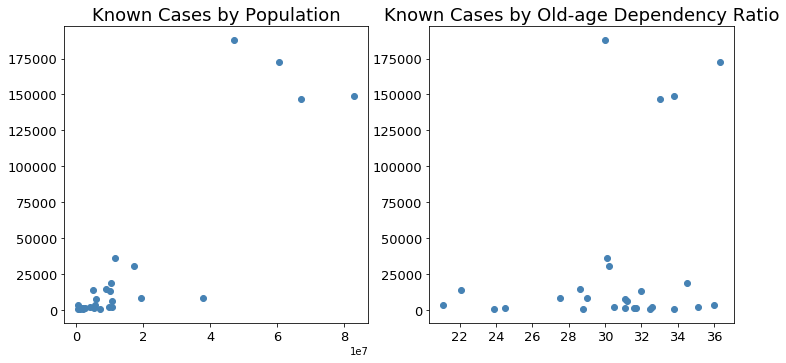

In [128]:
# two of the previous charts -- exactly the same, just formatted for the final report
fig = plt.figure(figsize = (12, 12))
ax1 = fig.add_subplot(2,2,1)    
ax2 = fig.add_subplot(2,2,2)

#setting the plots
ax1.scatter(europe.population, europe.known_cases, color = 'steelblue')
ax2.scatter(europe.oldage_ratio, europe.known_cases, color = 'steelblue')

#titling
ax1.set_title('Known Cases by Population', fontsize = 18)
ax2.set_title('Known Cases by Old-age Dependency Ratio', fontsize = 18)

#increasing fontsize for the axes
for label in (ax1.get_xticklabels() + ax1.get_yticklabels()):
    label.set_fontsize(13)
for label in (ax2.get_xticklabels() + ax2.get_yticklabels()):
    label.set_fontsize(13)

# pie chart for known cases in the EU

Text(0.5, 1.0, 'Known Cases by Country')

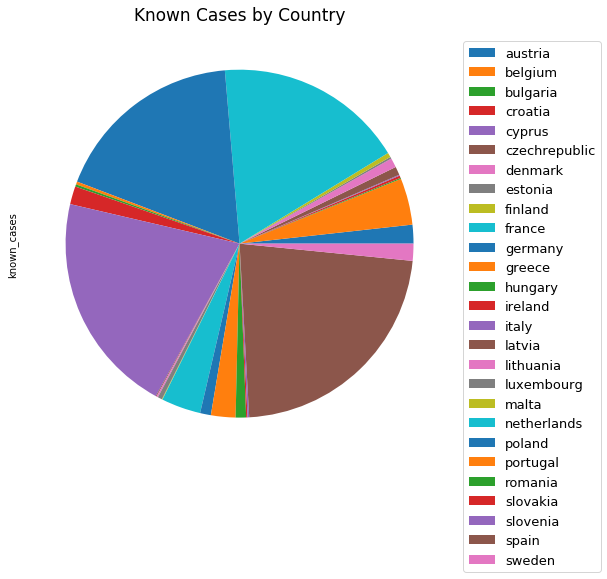

In [24]:
#pie chart for known cases in the EU
plot = europe.plot.pie(y='known_cases', figsize=(8, 8), labels = None)
plot.legend(bbox_to_anchor = (1, .98), labels = europe.index, fontsize = 13)
plot.set_title(label = 'Known Cases by Country', fontsize = 17)

# Adding a series for data on % of each country that is overweight
This didn't tell us anything conclusive -- left it out of the report, but kept it in this analysis
from: https://ec.europa.eu/eurostat/tgm/table.do?tab=table&init=1&language=en&pcode=sdg_02_10&plugin=1

In [70]:
#uploading data on percentage of people in each country who are overweight 
weight = pd.read_csv('EU_overweightperc.csv')

In [71]:
weight.head()

,TIME,2014
0,Austria,48.0
1,Belgium,49.3
2,Bulgaria,54.0
3,Croatia,57.4
4,Cyprus,48.3


In [72]:
#setting the index to country name
weight = weight.set_index('TIME')
weight.head()

,2014
TIME,
Austria,48.0
Belgium,49.3
Bulgaria,54.0
Croatia,57.4
Cyprus,48.3


In [73]:
weight['2014'] = weight['2014'].astype(float)

In [74]:
weight.head()

,2014
TIME,
Austria,48.0
Belgium,49.3
Bulgaria,54.0
Croatia,57.4
Cyprus,48.3


In [82]:
overweight_list = weight.values.tolist()
print(overweight_list)

[[48.0], [49.3], [54.0], [57.4], [48.3], [56.8], [47.7], [53.9], [54.7], [47.2], [52.1], [56.7], [55.2], [55.7], [44.9], [56.5], [55.6], [48.0], [61.0], [49.4], [54.7], [53.6], [55.8], [54.2], [56.6], [52.4], [49.9]]


In [83]:
#adding in this new data as a series to the europe dataset
europe['overweight'] = [48.0, 49.3, 54.0, 57.4, 48.3, 56.8, 47.7, 53.9, 54.7, 47.2, 52.1, 56.7, 55.2, 55.7, 44.9, 56.5, 55.6, 48.0, 61.0, 49.4, 54.7, 53.6, 55.8, 54.2, 56.6, 52.4, 49.9]

In [84]:
europe.head()

,population,gdp_capita,forecasted_weeks,known_cases,known_hcw,labstaff,beds_total,percent_availbeds,predcases_all,predcases_critical,...,hcw_required,deaths_estimated,deaths_actual,hcw_available,hcw_lacking,beds_lacking,cases_percapita,cases_percapita_perc,oldage_ratio,overweight
country,,,,,,,,,,,,,,,,,,,,,
austria,8883000,51462,4,14586,121892,2022,67511,0.033,1771729,88586,...,416566,NaN,NaN,97513.6,319052.4,21075,0.001642,0.164201,28.6,48.0
belgium,11538000,47519,4,36138,171045,2626,71536,0.033,2291216,114561,...,522623,NaN,NaN,136836.0,385787.0,43025,0.003132,0.313209,30.1,49.3
bulgaria,7000000,9273,6,846,67022,1574,47029,0.016,1382769,69138,...,286407,NaN,NaN,53617.6,232789.4,22109,0.000121,0.012086,33.8,54.0
croatia,4052000,14910,5,1814,46637,922,22691,0.033,808952,40448,...,155377,NaN,NaN,37309.6,118067.4,17757,0.000448,0.044768,32.6,57.4
cyprus,1207000,28690,5,750,9177,339,4104,0.036,240969,12048,...,46195,NaN,NaN,7341.6,38853.4,7944,0.000621,0.062138,23.9,48.3


Text(0, 0.5, 'Number of known cases')

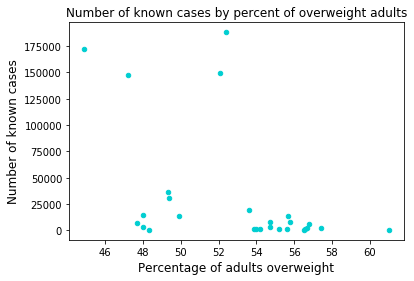

In [88]:
#a plot comparing percentage of adults overweight to known cases  as of April 17
ax = europe.plot.scatter(x = 'overweight', y = 'known_cases', title = 'Number of known cases by percent of overweight adults', color = 'darkturquoise')
ax.set_xlabel('Percentage of adults overweight', fontsize = 12)
ax.set_ylabel('Number of known cases', fontsize = 12)

In [91]:
#who are the countries with lowest percent of adults overweight?
weight['2014'].nsmallest(2)

TIME
Italy     44.9
France    47.2
Name: 2014, dtype: float64

In [92]:
#who are the countries with highest percent of adults overweight?
weight['2014'].nlargest(2)

TIME
Malta      61.0
Croatia    57.4
Name: 2014, dtype: float64

Text(0, 0.5, 'Number of known cases per capita')

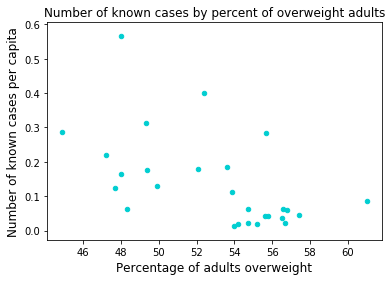

In [87]:
#a plot comparing percentage of adults overweight to known cases per capita as of April 17
ax = europe.plot.scatter(x = 'overweight', y = 'cases_percapita_perc', title = 'Number of known cases by percent of overweight adults', color = 'darkturquoise')
ax.set_xlabel('Percentage of adults overweight', fontsize = 12)
ax.set_ylabel('Number of known cases per capita', fontsize = 12)

# Adding a series for data on % of each country that smokes on a daily basis
This didn't tell us anything conclusive -- left the charts out of the report, but kept it in this analysis
from: https://ec.europa.eu/eurostat/tgm/table.do?tab=table&init=1&language=en&pcode=sdg_02_10&plugin=1

In [93]:
#adding in this new data as a series to the europe dataset
europe['smokers_perc'] = [23.9,17.2,27.3,24.5,25.2,21.2,12.3,22.7,11.6,20.5,15,27,25.8,12.7,17.4,24.1,20.2,13.8,18.9,17.2,21.9,16.3,19.8,22.6,18,22.2,8.7]
europe.head()

,population,gdp_capita,forecasted_weeks,known_cases,known_hcw,labstaff,beds_total,percent_availbeds,predcases_all,predcases_critical,...,deaths_estimated,deaths_actual,hcw_available,hcw_lacking,beds_lacking,cases_percapita,cases_percapita_perc,oldage_ratio,overweight,smokers_perc
country,,,,,,,,,,,,,,,,,,,,,
austria,8883000,51462,4,14586,121892,2022,67511,0.033,1771729,88586,...,NaN,NaN,97513.6,319052.4,21075,0.001642,0.164201,28.6,48.0,23.9
belgium,11538000,47519,4,36138,171045,2626,71536,0.033,2291216,114561,...,NaN,NaN,136836.0,385787.0,43025,0.003132,0.313209,30.1,49.3,17.2
bulgaria,7000000,9273,6,846,67022,1574,47029,0.016,1382769,69138,...,NaN,NaN,53617.6,232789.4,22109,0.000121,0.012086,33.8,54.0,27.3
croatia,4052000,14910,5,1814,46637,922,22691,0.033,808952,40448,...,NaN,NaN,37309.6,118067.4,17757,0.000448,0.044768,32.6,57.4,24.5
cyprus,1207000,28690,5,750,9177,339,4104,0.036,240969,12048,...,NaN,NaN,7341.6,38853.4,7944,0.000621,0.062138,23.9,48.3,25.2


In [100]:
#ho has the largest percentage of daily smokers
europe['smokers_perc'].nlargest()

country
bulgaria    27.3
greece      27.0
hungary     25.8
cyprus      25.2
croatia     24.5
Name: smokers_perc, dtype: float64

In [99]:
#who has the smallest percentage of daily smokers
europe['smokers_perc'].nsmallest()

country
sweden         8.7
finland       11.6
denmark       12.3
ireland       12.7
luxembourg    13.8
Name: smokers_perc, dtype: float64

Text(0.5, 1.0, 'Number of known cases by percentage of overweight adults')

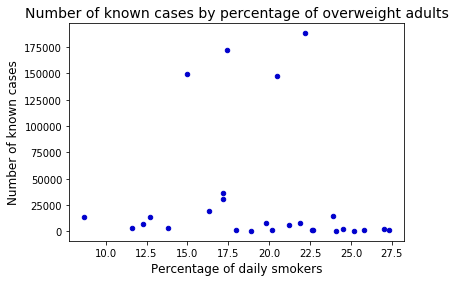

In [111]:
#a plot comparing percentage of adults smokers to known cases  as of April 17
ax = europe.plot.scatter(x = 'smokers_perc', y = 'known_cases', color = 'mediumblue')
ax.set_xlabel('Percentage of daily smokers', fontsize = 12)
ax.set_ylabel('Number of known cases', fontsize = 12)
ax.set_title('Number of known cases by percentage of overweight adults', fontsize = 14)

Text(0.5, 1.0, 'Number of known cases per capita by population percentage of daily smokers')

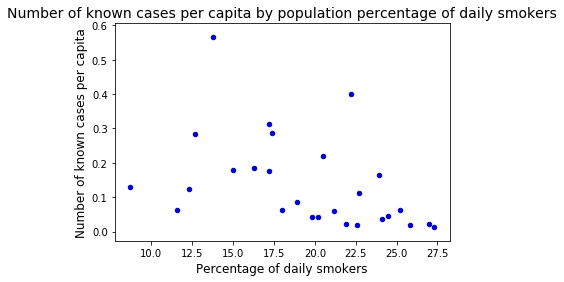

In [110]:
#a plot comparing percentage of adult smokers to known cases per capita as of April 17
ax = europe.plot.scatter(x = 'smokers_perc', y = 'cases_percapita_perc',  color = 'mediumblue')
ax.set_xlabel('Percentage of daily smokers', fontsize = 12)
ax.set_ylabel('Number of known cases per capita', fontsize = 12)
ax.set_title('Number of known cases per capita by population percentage of daily smokers', fontsize = 14)